In [1]:
# Animation of Vorticity Equation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.animation as animation
import sys
import warnings
warnings.filterwarnings('ignore')

In [3]:
ani_data = np.genfromtxt('animate_data2', delimiter=',') # submission is animate_data

In [4]:
print(np.shape(ani_data))

(4096, 161)


In [5]:
# include constants for plotting
# Define Constants_____
L = 10
# tspan = np.arange(0, tend+dt, dt)
Nt = 161  # need to change Nt based upon number of time steps
x = np.linspace(-L, L, 65)
x = x[:-1]
y = np.linspace(-L, L, 65)
y = y[:-1]

In [6]:
data = ani_data.reshape(64,64,161) # need to change this value based upon number of time steps
print(np.shape(data))
print(np.shape(x))

(64, 64, 161)
(64,)


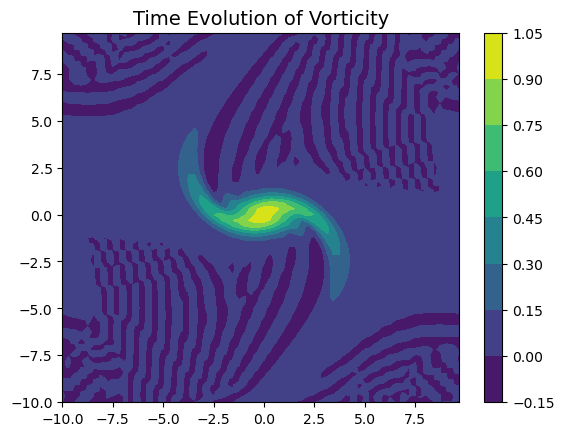

In [7]:
sol_plot = data[:, :,160]
sol_plot = sol_plot.T

fig1, ax5 = plt.subplots()

lvls = np.linspace(0, 1.0, 15)
X, Y = np.meshgrid(x, y)
surf = ax5.contourf(X, Y, sol_plot) #, levels=lvls)
fig1.colorbar(surf)
plt.title('Time Evolution of Vorticity', fontsize=14, y=1.0)
plt.show()

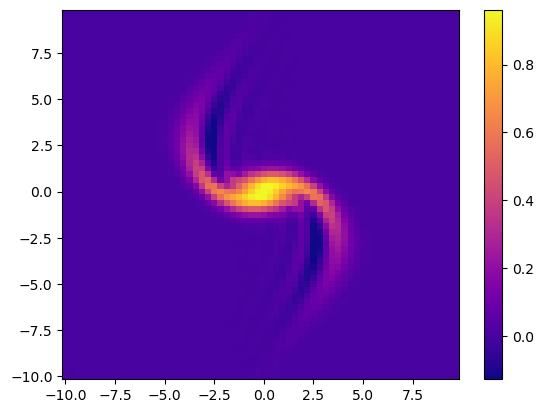

In [8]:
fig2,ax=plt.subplots(1,1)
cp = ax.pcolormesh(X,Y,sol_plot,cmap='plasma',shading='auto')
fig2.colorbar(cp)
plt.show()

In [9]:
# try the simpler code
# Generate data for plotting
x1,y1 = np.meshgrid(x,y)
z0 = np.exp(-(x1-L/2)**2-(y1-L/2)**2)   # 2 dimensional Gaussian
#Nt = 81
print(np.shape(x))

(64,)


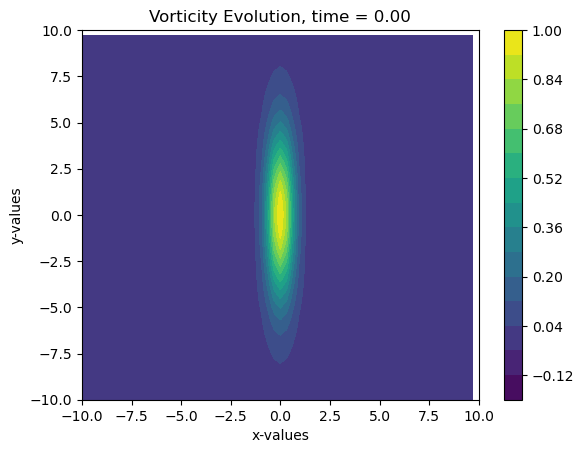

In [10]:

def image(i):   # function returns a 2D data array
    return data[:, :,i].T


# This is the figure
fig = plt.figure()
ax = plt.axes(xlim=(-L, L), ylim=(-L, L), xlabel='x-values', ylabel='y-values')

cvals = np.linspace(-0.2,1,16)      # set contour values 
cont = plt.contourf(x1, y1, image(0), cvals)    # first image on screen
plt.colorbar()

# animation function
def animate(i):
    global cont
    z = image(i)
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x1, y1, z, cvals)
    plt.title('Vorticity Evolution, time = %.2f' % (i/10))
#    plt.title('t = %i:  %.2f' % (i/10,z[5,5]))
    return cont

anim = animation.FuncAnimation(fig, animate, frames=Nt, repeat=False)
writergif=animation.PillowWriter(fps=16)
anim.save('Vorticiy-Animation.gif', writer=writergif)